## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import tensorflow as tf
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## 建立你的神經網路 

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

##  設定超參數


In [6]:
import numpy as np
learning_rate = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epochs        = 50
batch_size    = 256
momentum      = 0.95
#momentum      = np.linspace(0.1, 0.95, num=5, endpoint=True)

## 撰寫你的訓練流程並將結果用 dictionary 紀錄
* 使用迴圈，建立不同 Learning rate 的模型並訓練
 

In [7]:
results = {}
for lr in learning_rate:
#for moment in momentum:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs = epochs, 
              batch_size = batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



W0719 15:27:34.901987  4084 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0719 15:27:34.902961  4084 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 15:27:34.905939  4084 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 15:27:34.906935  4084 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 15:27:34.908947  4084 deprecation_wrapper.py:119] From c:\python36\lib\sit

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.8235 - acc: 0.3493 - val_loss: 1.7617 - val_acc: 0.3684
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5972 - acc: 0.4322 - val_loss: 1.5656 - val_acc: 0.4404
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5066 - acc: 0.4660 - val_loss: 1.5290 - val_acc: 0.4561
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4447 - acc: 0.4904 - val_loss: 1.5189 - val_acc: 0.4535
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3976 - acc: 0.5007 - val_loss: 1.4809 - val_acc: 0.4654
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3557 - acc: 0.5192 - val_loss: 1.4885 - val_acc: 0.4744
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.3214 - acc: 0.5319 - val_loss: 1.4074 - val_acc

50000/50000 [==============================] - 2s 42us/step - loss: 1.8038 - acc: 0.3670 - val_loss: 1.7486 - val_acc: 0.3948
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7144 - acc: 0.4014 - val_loss: 1.6777 - val_acc: 0.4145
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6544 - acc: 0.4227 - val_loss: 1.6399 - val_acc: 0.4339
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6097 - acc: 0.4375 - val_loss: 1.6085 - val_acc: 0.4341
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5730 - acc: 0.4519 - val_loss: 1.5775 - val_acc: 0.4425
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5415 - acc: 0.4621 - val_loss: 1.5596 - val_acc: 0.4480
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5132 - acc: 0.4710 - val_loss: 1.5306 - val_acc: 0.4587
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.9917 - acc: 0.3004 - val_loss: 1.9727 - val_acc: 0.3091
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9523 - acc: 0.3152 - val_loss: 1.9377 - val_acc: 0.3260
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.9203 - acc: 0.3281 - val_loss: 1.9102 - val_acc: 0.3340
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8940 - acc: 0.3370 - val_loss: 1.8855 - val_acc: 0.3408
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8716 - acc: 0.3469 - val_loss: 1.8651 - val_acc: 0.3492
Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8526 - acc: 0.3530 - val_loss: 1.8486 - val_acc: 0.3502
Epoch 10/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.8355 - acc: 0.3604 - val_loss: 1.8317 - val_acc: 0.3589
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 41us/step - loss: 2.2372 - acc: 0.1717 - val_loss: 2.2289 - val_acc: 0.1811
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2236 - acc: 0.1853 - val_loss: 2.2158 - val_acc: 0.1933
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.2109 - acc: 0.1963 - val_loss: 2.2034 - val_acc: 0.2022
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1986 - acc: 0.2085 - val_loss: 2.1914 - val_acc: 0.2110
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1867 - acc: 0.2153 - val_loss: 2.1796 - val_acc: 0.2157
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.1751 - acc: 0.2224 - val_loss: 2.1681 - val_acc: 0.2231
Epoch 11/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1637 - acc: 0.2281 - val_loss: 2.1571 - val_acc: 0.2270
Epoch 12/50
50000/50000 [=========================

### 將結果繪出

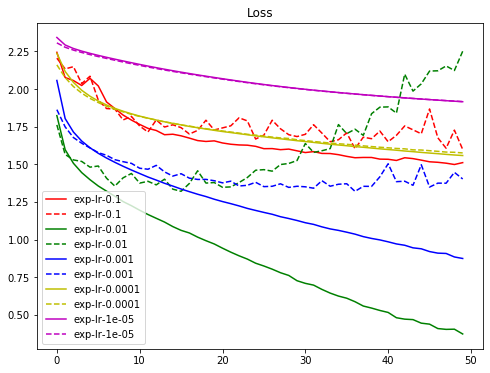

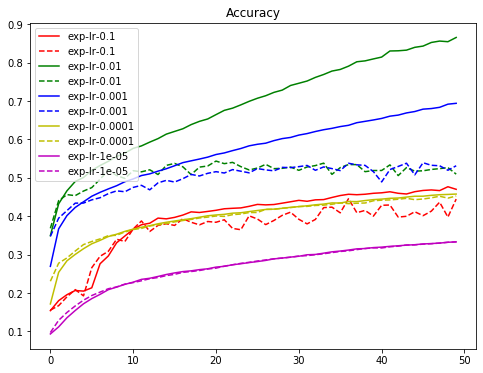

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()